In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyemu
import flopy
import platform
from pathlib import Path
import shutil
import pandas as pd

In [2]:
org_ws = Path('../MV_Model_Files/')
new_ws = 'simple_ies'
if "macos" in platform.platform().lower() or "darwin" in platform.platform().lower():
    exe_dir = Path('../bin/mac/')
elif "linux" in platform.platform().lower():
    exe_dir = Path('../bin/linux/')
else:
    exe_dir = Path('../bin/win/')

In [3]:
if os.path.exists(new_ws):
    shutil.rmtree(new_ws)
shutil.copytree(org_ws, new_ws)

'simple_ies'

In [4]:
sim = flopy.mf6.MFSimulation.load(sim_ws = new_ws)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package oc...
    loading package chd...
    loading package rch...
    loading package riv...
    loading package wel...
    loading package obs...
  loading solution package at...


In [5]:
shutil.copy2(os.path.join(exe_dir,'mf6'),os.path.join(new_ws,'mf6'))

'simple_ies/mf6'

In [6]:
pyemu.os_utils.run('mf6',cwd=new_ws)

                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.2 05/12/2025

        MODFLOW 6 compiled May 12 2025 12:37:58 with GCC version 13.3.0

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Also refer to the USGS Water 
Resources Software User Rights Notice for complete use, copyright, 
and distribution information

In [7]:
#need a spatial reference to use pilot points. this means xoff, yoff, rotation, epsg
m=sim.get_model()
m.modelgrid

xll:0.0; yll:0.0; rotation:0.0; units:feet; lenuni:1

In [8]:
pf = pyemu.utils.PstFrom(original_d=new_ws,
                         new_d='template',
                         remove_existing=True,
                         start_datetime="1-1-2025",
                         spatial_reference=m.modelgrid)

2025-07-09 09:17:11.293796 starting: opening PstFrom.log for logging
2025-07-09 09:17:11.293877 starting PstFrom process
2025-07-09 09:17:11.294195 starting: setting up dirs
2025-07-09 09:17:11.294229 starting: removing existing new_d 'template'
2025-07-09 09:17:11.298468 finished: removing existing new_d 'template' took: 0:00:00.004239
2025-07-09 09:17:11.298482 starting: copying original_d 'simple_ies' to new_d 'template'
2025-07-09 09:17:11.309234 finished: copying original_d 'simple_ies' to new_d 'template' took: 0:00:00.010752
2025-07-09 09:17:11.309344 finished: setting up dirs took: 0:00:00.015149


In [9]:
?pf.add_parameters

Signature:
pf.add_parameters(
    filenames,
    par_type,
    zone_array=None,
    dist_type='gaussian',
    sigma_range=4.0,
    upper_bound=None,
    lower_bound=None,
    transform=None,
    par_name_base='p',
    index_cols=None,
    use_cols=None,
    use_rows=None,
    pargp=None,
    pp_space=10,
    use_pp_zones=False,
    num_eig_kl=100,
    spatial_reference=None,
    geostruct=None,
    datetime=None,
    mfile_fmt='free',
    mfile_skip=None,
    mfile_sep=None,
    ult_ubound=None,
    ult_lbound=None,
    rebuild_pst=False,
    alt_inst_str='inst',
    comment_char=None,
    par_style='multiplier',
    initial_value=None,
)
Docstring:
Add list or array style model input files to PstFrom object.
This method is the main entry point for adding parameters to the
pest interface

Args:
    filenames (`str`): Model input filenames to parameterize. By default filename should give relative
        loction from top level of pest template directory
        (`new_d` as passed to `Ps

In [10]:
k_pars = [f for f in os.listdir(new_ws) if 'k_' in f and f.endswith('.ref')]
k_pars
for f in k_pars:
    pf.add_parameters(f,par_type='constant',upper_bound=20,lower_bound=0.05)

2025-07-09 09:17:11.327377 transform was not passed, setting default tranform to 'log'
2025-07-09 09:17:11.327466 starting: adding constant type m style parameters for file(s) ['k_aq.ref']
2025-07-09 09:17:11.327517 starting: loading array template/k_aq.ref
2025-07-09 09:17:11.327820 finished: loading array template/k_aq.ref took: 0:00:00.000303
2025-07-09 09:17:11.327835 loaded array 'simple_ies/k_aq.ref' of shape (40, 25)
2025-07-09 09:17:11.328388 starting: writing array-style template file 'template/p_inst0_constant.csv.tpl'
2025-07-09 09:17:11.328404 starting: writing template file template/p_inst0_constant.csv.tpl for ['p_inst:0']
2025-07-09 09:17:11.330729 finished: writing template file template/p_inst0_constant.csv.tpl for ['p_inst:0'] took: 0:00:00.002325
2025-07-09 09:17:11.330745 starting: writing array-based template file 'template/p_inst0_constant.csv.tpl'
2025-07-09 09:17:11.332314 finished: adding constant type m style parameters for file(s) ['k_aq.ref'] took: 0:00:00.0

/Users/jwhite/mambaforge/envs/gmdsitut/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
/Users/jwhite/mambaforge/envs/gmdsitut/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
/Users/jwhite/mambaforge/envs/gmdsitut/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.


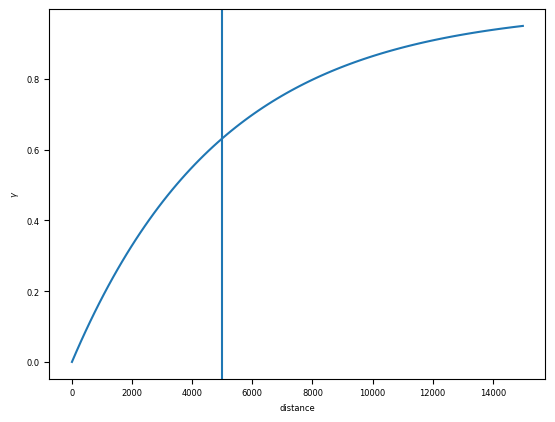

In [11]:
#for pilot points, we first need to build a variogram, which describes the underlying spatial correlation structure of the variable
pp_v = pyemu.geostats.ExpVario(contribution=1.0, a=5000) #rule of thumb is that range should be atleast 2x pp spacing (delr= 500
pp_gs = pyemu.geostats.GeoStruct(variograms=pp_v)
ax=pp_gs.plot()
ax.axvline(x=500*5*2)

In [12]:
for f in k_pars:
    base = f.split('.')[0]
    pf.add_parameters(f,par_type='pilotpoint',upper_bound=20,lower_bound=0.05,pp_space=3,geostruct=pp_gs)

2025-07-09 09:17:11.439899 transform was not passed, setting default tranform to 'log'
2025-07-09 09:17:11.440040 starting: adding pilotpoint type m style parameters for file(s) ['k_aq.ref']
2025-07-09 09:17:11.440072 starting: using geostruct:name:struct1,nugget:0.0,structures:
name:var1,contribution:1.0,a:5000.0,anisotropy:1.0,bearing:0.0

2025-07-09 09:17:11.440087 WARNING: 0) Inconsistency between geostruct transform and partrans.
2025-07-09 09:17:11.440112 WARNING: 1) Setting geostruct transform to log
2025-07-09 09:17:11.440123 WARNING: -) Better to pass an appropriately transformed geostruct
2025-07-09 09:17:11.440151 starting: loading array template/k_aq.ref
2025-07-09 09:17:11.440424 finished: loading array template/k_aq.ref took: 0:00:00.000273
2025-07-09 09:17:11.440449 loaded array 'simple_ies/k_aq.ref' of shape (40, 25)
2025-07-09 09:17:11.441418 starting: writing array-style template file 'template/p_inst2_pilotpoint.csv.tpl'
2025-07-09 09:17:11.441431 starting: setting u

/Users/jwhite/Dev/GMDSI_notebooks/dependencies/pyemu/pyemu/logger.py:100: PyemuWarning: 2025-07-09 09:17:11.440087 WARNING: 0) Inconsistency between geostruct transform and partrans.

/Users/jwhite/Dev/GMDSI_notebooks/dependencies/pyemu/pyemu/logger.py:100: PyemuWarning: 2025-07-09 09:17:11.440112 WARNING: 1) Setting geostruct transform to log

/Users/jwhite/Dev/GMDSI_notebooks/dependencies/pyemu/pyemu/logger.py:100: PyemuWarning: 2025-07-09 09:17:11.440123 WARNING: -) Better to pass an appropriately transformed geostruct



starting 0
starting 1
starting 2
starting 3
starting 4
starting 5
starting 6
starting 7
starting 8
starting 9
took 0.964954 seconds
2025-07-09 09:17:12.468157 finished: calculating factors for pargp=p_inst:2 took: 0:00:00.977699
2025-07-09 09:17:12.468190 starting: writing array-based template file 'template/p_inst2pp.dat.tpl'
2025-07-09 09:17:12.468231 saving zone array template/p_inst2pp.dat.zone for tpl file template/p_inst2pp.dat.tpl
2025-07-09 09:17:12.469495 finished: adding pilotpoint type m style parameters for file(s) ['k_aq.ref'] took: 0:00:01.029455
2025-07-09 09:17:12.469648 transform was not passed, setting default tranform to 'log'
2025-07-09 09:17:12.469676 starting: adding pilotpoint type m style parameters for file(s) ['k_clay.ref']
2025-07-09 09:17:12.469696 finished: using geostruct:name:struct1,nugget:0.0,structures:
name:var1,contribution:1.0,a:5000.0,anisotropy:1.0,bearing:0.0
 took: 0:00:01.029624
2025-07-09 09:17:12.469725 starting: loading array template/k_clay

In [13]:
?pf.add_observations

Signature:
pf.add_observations(
    filename,
    insfile=None,
    index_cols=None,
    use_cols=None,
    use_rows=None,
    prefix='',
    ofile_skip=None,
    ofile_sep=None,
    rebuild_pst=False,
    obsgp=None,
    zone_array=None,
    includes_header=True,
)
Docstring:
Add values in output files as observations to PstFrom object

Args:
    filename (`str`): model output file name(s) to set up
        as observations. By default filename should give relative
        loction from top level of pest template directory
        (`new_d` as passed to `PstFrom()`).
    insfile (`str`): desired instructions file filename
    index_cols (`list`-like or `int`): columns to denote are indices for obs
    use_cols (`list`-like or `int`): columns to set up as obs. If None,
        and `index_cols` is not None (i.e list-style obs assumed),
        observations will be set up for all columns in `filename` that
        are not in `index_cols`.
    use_rows (`list`-like or `int`): select only spe

In [14]:
obs_csvs = [f for f in os.listdir(new_ws) if f.endswith('.csv')]
for f in obs_csvs:
    df = pd.read_csv(os.path.join(new_ws,f))
    pf.add_observations(f,index_cols='time',use_cols=df.columns.tolist()[1:])

2025-07-09 09:17:12.521242 starting: adding observations from output file riv.csv
2025-07-09 09:17:12.521369 starting: adding observations from tabular output file '['riv.csv']'
2025-07-09 09:17:12.521400 starting: reading list-style file: template/riv.csv
2025-07-09 09:17:12.521833 finished: reading list-style file: template/riv.csv took: 0:00:00.000433
2025-07-09 09:17:12.522061 starting: building insfile for tabular output file riv.csv
2025-07-09 09:17:12.523173 finished: building insfile for tabular output file riv.csv took: 0:00:00.001112
2025-07-09 09:17:12.523199 starting: adding observation from instruction file 'template/riv.csv.ins'
2025-07-09 09:17:12.524231 finished: adding observation from instruction file 'template/riv.csv.ins' took: 0:00:00.001032
2025-07-09 09:17:12.524431 finished: adding observations from tabular output file '['riv.csv']' took: 0:00:00.003062
2025-07-09 09:17:12.524455 finished: adding observations from output file riv.csv took: 0:00:00.003213
2025-07

In [15]:
for f in k_pars:
    pf.add_observations(f)

2025-07-09 09:17:12.539855 starting: adding observations from output file k_aq.ref
2025-07-09 09:17:12.539922 starting: adding observations from array output file 'k_aq.ref'
2025-07-09 09:17:12.540870 starting: adding observation from instruction file 'template/k_aq.ref.ins'
2025-07-09 09:17:12.545259 finished: adding observation from instruction file 'template/k_aq.ref.ins' took: 0:00:00.004389
2025-07-09 09:17:12.545314 finished: adding observations from array output file 'k_aq.ref' took: 0:00:00.005392
2025-07-09 09:17:12.545339 finished: adding observations from output file k_aq.ref took: 0:00:00.005484
2025-07-09 09:17:12.545348 starting: adding observations from output file k_clay.ref
2025-07-09 09:17:12.545361 starting: adding observations from array output file 'k_clay.ref'
2025-07-09 09:17:12.545955 starting: adding observation from instruction file 'template/k_clay.ref.ins'
2025-07-09 09:17:12.550225 finished: adding observation from instruction file 'template/k_clay.ref.ins'

In [16]:
pf.mod_sys_cmds.append('mf6')

In [17]:
?pf.draw

Signature: pf.draw(num_reals=100, sigma_range=6, use_specsim=False, scale_offset=True)
Docstring:
Draw a parameter ensemble from the distribution implied by the initial parameter values in the
control file and the prior parameter covariance matrix.

Args:
    num_reals (`int`): the number of realizations to draw
    sigma_range (`int`): number of standard deviations represented by parameter bounds.  Default is 6 (99%
        confidence).  4 would be approximately 95% confidence bounds
    use_specsim (`bool`): flag to use spectral simulation for grid-scale pars (highly recommended).
        Default is False
    scale_offset (`bool`): flag to apply scale and offset to parameter bounds before calculating prior variance.
        Dfault is True.  If you are using non-default scale and/or offset and you get an exception during
        draw, try changing this value to False.

Returns:
    `pyemu.ParameterEnsemble`: a prior parameter ensemble

Note:
    This method draws by parameter group

 

In [18]:
pst = pf.build_pst(filename=os.path.join(pf.new_d,'at.pst'),version=2)

noptmax:0, npar_adj:210, nnz_obs:2048
2025-07-09 09:17:12.573173 forward_run line:pyemu.os_utils.run(r'mf6')



In [19]:
#draw prior ensemble that accounts for PP spatial correlation (this is for later for when we want to use iES)
pe = pf.draw(num_reals=100)
pe.to_binary(os.path.join(pf.new_d,'prior.jcb'))

2025-07-09 09:17:12.579133 starting: drawing realizations
2025-07-09 09:17:12.579494 starting: Drawing 210 non-specsim pars
building diagonal cov
processing  name:struct1,nugget:0.0,structures:
name:var1,contribution:1.0,a:5000.0,anisotropy:1.0,bearing:0.0

working on pargroups ['p_inst:2']
build cov matrix
done
getting diag var cov 104
scaling full cov by diag var cov
working on pargroups ['p_inst:3']
build cov matrix
done
getting diag var cov 104
scaling full cov by diag var cov
adding remaining parameters to diagonal
2025-07-09 09:17:12.606057 finished: Drawing 210 non-specsim pars took: 0:00:00.026563
2025-07-09 09:17:12.606105 finished: drawing realizations took: 0:00:00.026972


In [20]:
pst = pyemu.Pst(filename=os.path.join(pf.new_d,'at.pst'))
obs = pst.observation_data
obs

,obsnme,obsval,weight,obgnme,i,j,oname,otype,time,usecol
obsnme,,,,,,,,,,
oname:riv.csv_otype:lst_usecol:ds_time:1.0,oname:riv.csv_otype:lst_usecol:ds_time:1.0,-785445.318578,1.0,oname:riv.csv_otype:lst_usecol:ds,NaN,NaN,riv.csv,lst,1.0,ds
oname:riv.csv_otype:lst_usecol:pf_time:1.0,oname:riv.csv_otype:lst_usecol:pf_time:1.0,-95339.638962,1.0,oname:riv.csv_otype:lst_usecol:pf,NaN,NaN,riv.csv,lst,1.0,pf
oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_in_time:1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_in_time:1.0,88315.733996,1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_in,NaN,NaN,at.budget.csv,lst,1.0,chd(chd-1)
oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_out_time:1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_out_time:1.0,58615.043541,1.0,oname:at.budget.csv_otype:lst_usecol:chd(chd-1)_out,NaN,NaN,at.budget.csv,lst,1.0,chd(chd-1)
oname:at.budget.csv_otype:lst_usecol:percent_difference_time:1.0,oname:at.budget.csv_otype:lst_usecol:percent_difference_time:1.0,-0.000055,1.0,oname:at.budget.csv_otype:lst_usecol:percent_difference,NaN,NaN,at.budget.csv,lst,1.0,percent
...,...,...,...,...,...,...,...,...,...,...
oname:k_clay_otype:arr_i:9_j:5,oname:k_clay_otype:arr_i:9_j:5,0.761604,1.0,oname:k_clay.ref_otype:arr,9,5,k,arr,NaN,NaN
oname:k_clay_otype:arr_i:9_j:6,oname:k_clay_otype:arr_i:9_j:6,0.761604,1.0,oname:k_clay.ref_otype:arr,9,6,k,arr,NaN,NaN
oname:k_clay_otype:arr_i:9_j:7,oname:k_clay_otype:arr_i:9_j:7,0.761604,1.0,oname:k_clay.ref_otype:arr,9,7,k,arr,NaN,NaN


In [21]:
pyemu.os_utils.run('pestpp-ies at.pst',cwd='template')



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.19
binary compiled on Apr 28 2025 at 09:25:40

started at 07/09/25 09:17:12
...processing command line: ' pestpp-ies at.pst'
...using serial run manager

using control file: "at.pst"
in directory: "/Users/jwhite/Dev/PESTPP_Madison25/notebooks/template"
on host: "jwhites-MacBook-Pro.local"

processing control file at.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  at.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 4
...running control file parameter values



    ---  starting serial run m

In [22]:
pst.set_res(os.path.join(pf.new_d,"at.base.rei"))

In [23]:
pst.phi

2.008037696725308e-11

In [24]:
#zero everything out for starters
obs.weight = 0

In [25]:
#we need to tell PEST what are the observed values and their weights, to calc the objective function
truth = pd.read_csv(os.path.join(new_ws,'obsvalues.dat'),delim_whitespace=True)
truth

/var/folders/rz/0ct55nv140jc0c8jsd454kwh0000gn/T/ipykernel_72138/2762166273.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


,obsnme,obsval,weight,obgnme
0,w01,11.85000,1.000000,headgroup
1,w02,11.35000,1.000000,headgroup
2,w03,11.83000,1.000000,headgroup
3,w04,11.43000,1.000000,headgroup
4,w05,10.50000,1.000000,headgroup
5,w06,10.79000,1.000000,headgroup
6,w07,9.13000,1.000000,headgroup
7,w08,8.79000,1.000000,headgroup
8,w09,8.83000,1.000000,headgroup
9,w10,10.64000,1.000000,headgroup


In [26]:
obs["standard_deviation"] = np.nan
for i,stuff in truth.iterrows():
    obs.loc[obs.obsnme.str.contains(stuff.obsnme),'obsval'] = stuff.obsval
    obs.loc[obs.obsnme.str.contains(stuff.obsnme),'weight'] = stuff.weight
    obs.loc[obs.obsnme.str.contains(stuff.obsnme),'obgnme'] = stuff.obgnme
    if "headdiff" in stuff.obgnme:
        obs.loc[obs.obsnme.str.contains(stuff.obsnme),'standard_deviation'] = 0.0001
    elif "headgroup" in stuff.obgnme:
        obs.loc[obs.obsnme.str.contains(stuff.obsnme),'standard_deviation'] = 0.5
    else:
        obs.loc[obs.obsnme.str.contains(stuff.obsnme),'standard_deviation'] = np.abs(stuff.obsval) * 0.2 #20%

/var/folders/rz/0ct55nv140jc0c8jsd454kwh0000gn/T/ipykernel_72138/304307766.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [37]:
obs.loc[obs.weight>0,:].describe()

,obsval,weight,standard_deviation
count,37.000000,37.000000,37.000000
mean,-25871.727271,0.838660,5537.102230
std,147738.693071,0.371795,29480.082596
min,-894494.000000,0.000013,0.000100
25%,4.180000,1.000000,0.500000
50%,8.820000,1.000000,0.500000
75%,10.800000,1.000000,0.500000
max,33390.410960,1.000000,178898.800000


In [27]:
pst.observation_data = obs
pst.write(os.path.join(pf.new_d,'at.pst'),version=2)

noptmax:0, npar_adj:210, nnz_obs:37


In [28]:
pyemu.os_utils.run('pestpp-ies at.pst',cwd='template')



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.19
binary compiled on Apr 28 2025 at 09:25:40

started at 07/09/25 09:17:13
...processing command line: ' pestpp-ies at.pst'
...using serial run manager

using control file: "at.pst"
in directory: "/Users/jwhite/Dev/PESTPP_Madison25/notebooks/template"
on host: "jwhites-MacBook-Pro.local"

processing control file at.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  at.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 4
...running control file parameter values



    ---  starting serial run m

In [29]:
phi= pst.phi
phi

7.436118274958799

In [30]:
pst.parameter_data.loc[:,"parval1"] = pe.loc[pe.index[0],pst.par_names].values

In [31]:
pst.parameter_data.head()

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,i,inst,j,pname,pstyle,ptype,zone
parnme,,,,,,,,,,,,,,,,,
pname:p_inst:0_ptype:cn_pstyle:m,pname:p_inst:0_ptype:cn_pstyle:m,log,factor,0.254059,0.05,20.0,p_inst:0,1.0,0.0,1,NaN,0,NaN,p,m,cn,NaN
pname:p_inst:1_ptype:cn_pstyle:m,pname:p_inst:1_ptype:cn_pstyle:m,log,factor,2.772770,0.05,20.0,p_inst:1,1.0,0.0,1,NaN,1,NaN,p,m,cn,NaN
pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:1_zone:1,pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:1_zone:1,log,factor,0.588591,0.05,20.0,p_inst:2,1.0,0.0,1,1,2,1,p,m,pp,1
pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:4_zone:1,pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:4_zone:1,log,factor,0.724949,0.05,20.0,p_inst:2,1.0,0.0,1,1,2,4,p,m,pp,1
pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:7_zone:1,pname:p_inst:2_ptype:pp_pstyle:m_i:1_j:7_zone:1,log,factor,0.621493,0.05,20.0,p_inst:2,1.0,0.0,1,1,2,7,p,m,pp,1


In [32]:
pst.write(os.path.join(pf.new_d,"test.pst"),version=2)
pyemu.os_utils.run("pestpp-ies test.pst",cwd=pf.new_d)

noptmax:0, npar_adj:210, nnz_obs:37


             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.19
binary compiled on Apr 28 2025 at 09:25:40

started at 07/09/25 09:17:13
...processing command line: ' pestpp-ies test.pst'
...using serial run manager

using control file: "test.pst"
in directory: "/Users/jwhite/Dev/PESTPP_Madison25/notebooks/template"
on host: "jwhites-MacBook-Pro.local"

processing control file test.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  test.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 4
...running control file parame

In [33]:
pst.set_res(os.path.join(pf.new_d,"test.base.rei"))
pst.phi

8580.310316439443

In [34]:
kobs = obs.loc[obs.obsnme.str.contains("k_aq"),:].copy()
kobs['i'] = kobs.i.astype(int)
kobs['j'] = kobs.j.astype(int)

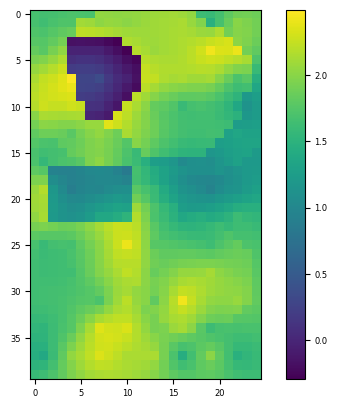

In [35]:
arr = np.zeros((kobs.i.max()+1,kobs.j.max()+1))
arr[kobs.i,kobs.j] = np.log10(pst.res.loc[kobs.obsnme,"modelled"].values)
cb = plt.imshow(arr)
plt.colorbar(cb)